Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


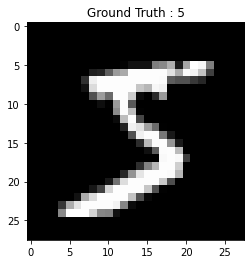

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 114us/step - loss: 0.8038 - accuracy: 0.8097 - val_loss: 0.3218 - val_accuracy: 0.9147
Epoch 2/5
60000/60000 [==============================] - 7s 110us/step - loss: 0.2630 - accuracy: 0.9277 - val_loss: 0.2163 - val_accuracy: 0.9367
Epoch 3/5
60000/60000 [==============================] - 7s 111us/step - loss: 0.2196 - accuracy: 0.9367 - val_loss: 0.1945 - val_accuracy: 0.9457
Epoch 4/5
60000/60000 [==============================] - 7s 110us/step - loss: 0.2119 - accuracy: 0.9377 - val_loss: 0.1984 - val_accuracy: 0.9421
Epoch 5/5
10000/10000 [==============================] - 1s 74us/step
Evaluation result on Test Data : Loss = 0.2202737055361271, accuracy = 0.9362000226974487


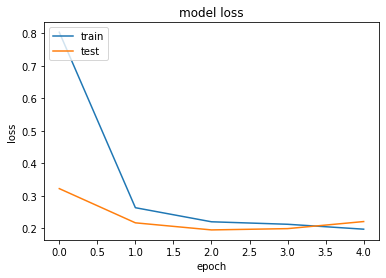

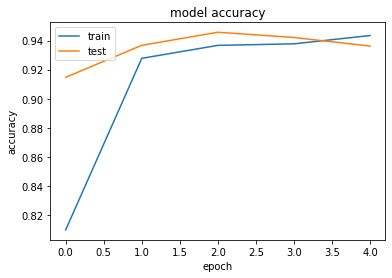

The prediction of the 30th in the test dataset is:  [3]


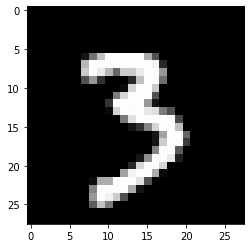

In [1]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()
#display the first image in the training data
plt.imshow(train_images[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[0]))
plt.show()

#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')

#scale data
#train_data /=255.0
#test_data /=255.0
#change the labels frominteger to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
# Adding hidden layers
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=5, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# Accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#display the test image in the training data

predict_test = model.predict_classes(test_data[[30], :])
print("The prediction of the 30th in the test dataset is: ", predict_test)

plt.imshow(test_images[30,:,:],cmap='gray')
plt.show()